# **An√°lise Explorat√≥ria de Sal√°rios em Carreiras de Dados**

## **Fun√ß√µes e bibliotecas necess√°rias para o projeto**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

## **Iniciando o projeto utilizando a metodologia CRISP-DM**

### **1.0 - Entendimento do Neg√≥cio**

#### **Contextualiza√ß√£o**

Nos √∫ltimos anos, a √°rea de Ci√™ncia de Dados cresceu de forma acelerada, se tornando uma das mais promissoras no mercado de tecnologia. Profissionais como Data Analysts e Data Scientists passaram a ser cada vez mais valorizados, mas ainda existe muita d√∫vida sobre como os sal√°rios variam entre cargos, n√≠veis de experi√™ncia e localiza√ß√£o.

Este projeto tem como objetivo realizar uma An√°lise Explorat√≥ria de Dados (EDA) sobre sal√°rios de profissionais da √°rea de dados, utilizando um dataset p√∫blico do Kaggle. A an√°lise busca responder perguntas como:

1- Qual a distribui√ß√£o de sal√°rios em d√≥lar para profissionais de dados?

2- Como variam os sal√°rios entre Data Analysts e Data Scientists?

3- Qual o impacto do n√≠vel de experi√™ncia (junior, pleno, s√™nior, executivo) na remunera√ß√£o?

4- H√° diferen√ßas significativas dependendo da localiza√ß√£o da empresa?

#### **Objetivo**

Este projeto tem como objetivo **analisar e prever sal√°rios na √°rea de tecnologia e ci√™ncia de dados** utilizando um dataset p√∫blico.  
A ideia √© demonstrar minhas habilidades como **Analista/Cientista de Dados J√∫nior**, aplicando boas pr√°ticas de todo o ciclo de um projeto de Data Science (CRISP-DM):  

1. **Entendimento do Neg√≥cio** ‚Üí analisar os fatores que influenciam sal√°rios.  
2. **Entendimento dos Dados** ‚Üí explorar e compreender as vari√°veis dispon√≠veis.  
3. **Prepara√ß√£o dos Dados** ‚Üí tratamento de dados faltantes, codifica√ß√£o de vari√°veis categ√≥ricas e normaliza√ß√£o.  
4. **Modelagem** ‚Üí aplica√ß√£o de Regress√£o Linear para prever sal√°rios.  
5. **Avalia√ß√£o** ‚Üí compara√ß√£o entre modelos por m√©tricas (MAE, RMSE, R¬≤) e an√°lise gr√°fica de res√≠duos e import√¢ncia de vari√°veis.  
6. **Conclus√£o** ‚Üí discuss√£o dos resultados e poss√≠veis melhorias.  

Ao final, apresento **insights pr√°ticos sobre quais fatores mais impactam o sal√°rio** e mostro, de forma clara, minhas habilidades em:  

- An√°lise Explorat√≥ria de Dados (EDA)  
- Visualiza√ß√£o com Matplotlib/Seaborn  
- Prepara√ß√£o de dados com Pandas/Scikit-Learn  
- Modelagem preditiva com Regress√£o Linear 
- Interpreta√ß√£o de m√©tricas e comunica√ß√£o de resultados  

### **2.0 - Entendimento dos Dados**

#### **Sobre os Dados**

Downlaod realizado em [Kaggle](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data?resource=download)

#### **Descri√ß√£o das Colunas**

**work_year**

    Ano em que o sal√°rio ou a vaga foi registrado.

    Exemplo: 2023.

    Permite an√°lise de evolu√ß√£o salarial ou tend√™ncias do mercado ao longo dos anos.

**job_title**

    Nome do cargo.

    Exemplo: Data Scientist, Data Engineer, Data Architect.

    Mostra a variedade de posi√ß√µes no mercado de dados.

**job_category**

    Agrupamento das fun√ß√µes em categorias mais amplas.

    Exemplo: Data Science and Research, Data Engineering, Data Architecture and Modeling.

    Facilita identificar √°reas mais bem pagas ou mais demandadas.

**salary_currency**

    Moeda em que o sal√°rio foi reportado.

    Exemplo: USD, EUR, GBP.

**salary**

    Valor do sal√°rio na moeda original reportada.

**salary_in_usd**

    Valor convertido para d√≥lares americanos (USD).

    Permite compara√ß√µes diretas entre pa√≠ses.

**employee_residence**

    Pa√≠s de resid√™ncia do empregado.

    Exemplo: Germany, United States, Brazil.

    √ötil para comparar sal√°rios por pa√≠s de resid√™ncia.

**experience_level**

    N√≠vel de experi√™ncia do profissional.

    Exemplo: Entry-level, Mid-level, Senior, Executive.

    Permite avaliar a progress√£o salarial conforme experi√™ncia.

**employment_type**

    Tipo de contrato.

    Exemplo: Full-time, Part-time, Contract, Freelance.

    Mostra a estrutura de contrata√ß√£o no mercado.

**work_setting**

    Modelo de trabalho.

    Exemplo: Remote, Hybrid, In-person.

    Permite avaliar se o trabalho remoto impacta sal√°rios.

**company_location**

    Localiza√ß√£o da empresa (pa√≠s).

    Exemplo: United States, Germany, India.

    Pode diferir do pa√≠s de resid√™ncia do empregado.

**company_size**

    Tamanho da empresa:

        S = Pequena (at√© 50 funcion√°rios)

        M = M√©dia (51 a 250 funcion√°rios)

        L = Grande (mais de 250 funcion√°rios)

    √ötil para entender diferen√ßas salariais entre empresas de portes distintos.

OBS.: Dataset robusto, com **9.355 registros** de vagas/sal√°rios na √°rea de dados, abrangendo diferentes anos, cargos, pa√≠ses, n√≠veis de experi√™ncia e tipos de trabalho.

#### **Coletando os dados**

In [2]:
df = pd.read_csv(r'data\jobs_in_data.csv', sep=',')

In [3]:
df.head()

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
print(f"{df.duplicated().sum() / df['work_year'].count():.2%} do Dataframe possui registros duplicados")

42.91% do Dataframe possui registros duplicados


**Diagn√≥stico de qualidade dos dados**

    N√£o h√° valores ausentes ou nulos.

    Existem duplicados (‚âà43%), mas decidi mant√™-los pois √© perfeitamente poss√≠vel termos mesmos valores para indiv√≠duos diferentes neste cen√°rio.

    'salary_in_usd' ser√° a m√©trica principal.

**Resumo estat√≠stico das vari√°veis (num√©ricas e categ√≥ricas)**

In [6]:
# Vari√°veis num√©ricas
display(df.describe().T)
        
# Vari√°veis categ√≥ricas
display(df.describe(include=['object']))

count           mean           std      min       25%  \
work_year      9355.0    2022.760449      0.519470   2020.0    2023.0   
salary         9355.0  149927.981293  63608.835387  14000.0  105200.0   
salary_in_usd  9355.0  150299.495564  63177.372024  15000.0  105700.0   

                    50%       75%       max  
work_year        2023.0    2023.0    2023.0  
salary         143860.0  187000.0  450000.0  
salary_in_usd  143000.0  186723.0  450000.0

job_title               job_category salary_currency  \
count            9355                       9355            9355   
unique            125                         10              11   
top     Data Engineer  Data Science and Research             USD   
freq             2195                       3014            8591   

       employee_residence experience_level employment_type work_setting  \
count                9355             9355            9355         9355   
unique                 83                4               4            3   
top         United States           Senior       Full-time    In-person   
freq                 8086             6709            9310         5730   

       company_location company_size  
count              9355         9355  
unique               70            3  
top       United States            M  
freq               8132         8448

**Distribui√ß√£o das vari√°veis categ√≥ricas principais**

In [7]:
for col in ['experience_level', 'employment_type', 'work_setting', 'company_size']:
    print('---')
    print(df[col].value_counts())

---
experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64
---
employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64
---
work_setting
In-person    5730
Remote       3434
Hybrid        191
Name: count, dtype: int64
---
company_size
M    8448
L     748
S     159
Name: count, dtype: int64


**Visualiza√ß√µes gr√°ficas b√°sicas**

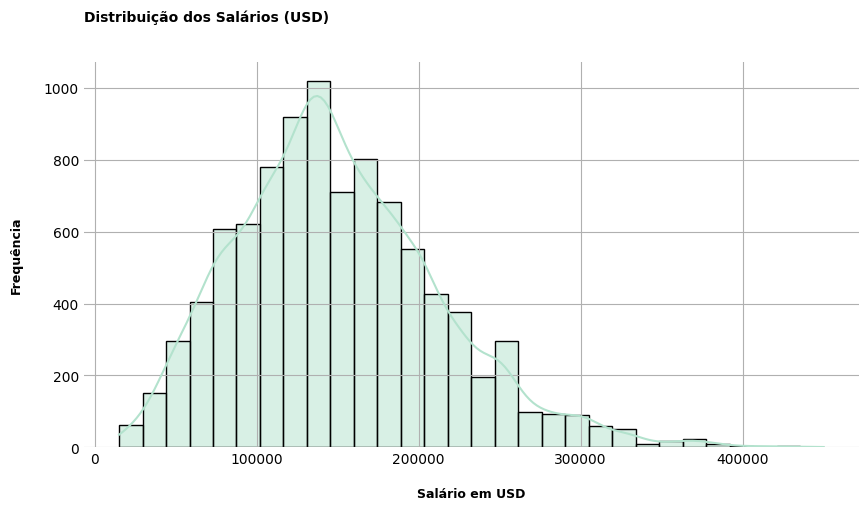

In [8]:
# Histograma do sal√°rio em USD
## Definindo as cores do gr√°fico
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribui√ß√£o dos Sal√°rios (USD)',fontsize=10,loc='left',pad=30, fontweight='bold')
plt.xlabel('Sal√°rio em USD', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Frequ√™ncia', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**1. Distribui√ß√£o dos Sal√°rios (Histograma + KDE)**

O que vemos: 

    A maioria dos sal√°rios se concentra em uma faixa mais baixa a m√©dia, enquanto poucos sal√°rios aparecem nas faixas muito altas.

Interpreta√ß√£o:

    A distribui√ß√£o √© assim√©trica √† direita (right-skewed) ‚Üí muitos profissionais ganham valores medianos, mas h√° outliers com sal√°rios bem elevados.

    Esse comportamento √© comum em remunera√ß√µes onde poucos executivos ou especialistas recebem sal√°rios muito acima da m√©dia.

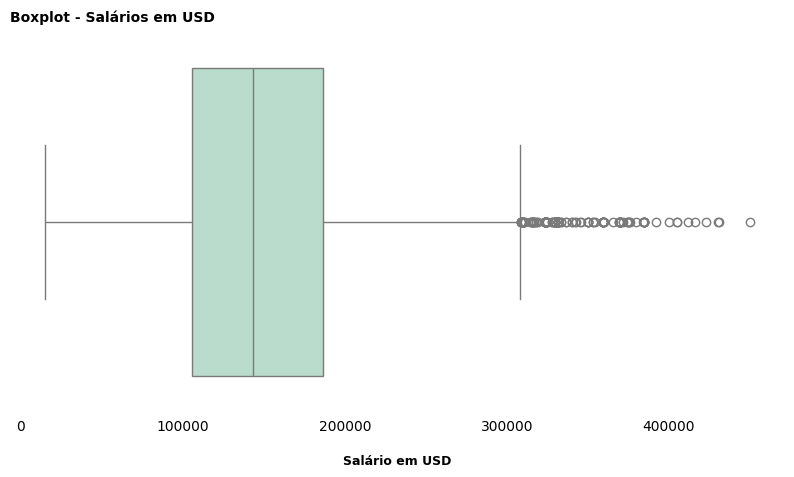

In [9]:
# Boxplot para detectar outliers de sal√°rio
plt.figure(figsize=(10,5))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot - Sal√°rios em USD', loc='left', fontsize=10, fontweight='bold')
plt.xlabel('Sal√°rio em USD', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.show()

**2. Boxplot dos Sal√°rios**

O que vemos: 

    A mediana est√° em uma faixa mais baixa, com grande concentra√ß√£o at√© o 3¬∫ quartil, e diversos outliers acima.

Interpreta√ß√£o:

    Os outliers n√£o devem ser ignorados, pois podem representar posi√ß√µes de lideran√ßa (executives) ou oportunidades em mercados de alta remunera√ß√£o.

    Confirma a dispers√£o salarial e a diferen√ßa significativa entre cargos de entrada e cargos avan√ßados.

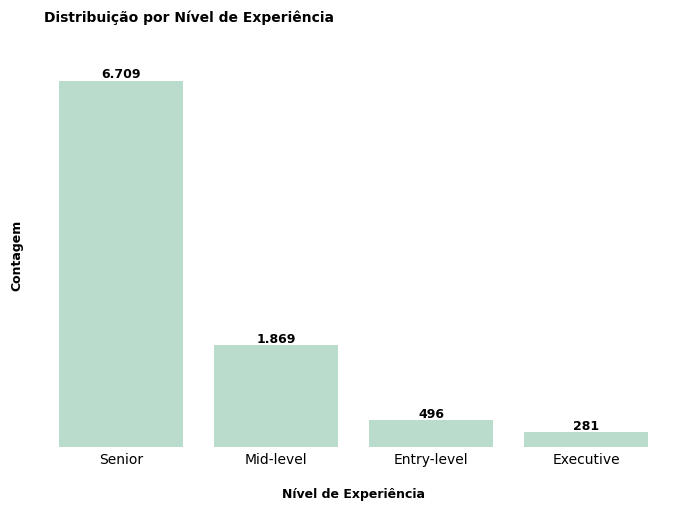

In [10]:
# Contagem por n√≠vel de experi√™ncia
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posi√ß√£o centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold',
    )
    
plt.title('Distribui√ß√£o por N√≠vel de Experi√™ncia', pad=30,loc='left',fontsize=10, fontweight='bold')
plt.xlabel('N√≠vel de Experi√™ncia',labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Contagem', labelpad=15, fontsize=9, fontweight='semibold')
plt.tick_params(axis='both', length=0)
plt.box(False)
plt.yticks([])
plt.show()

**3. Distribui√ß√£o por N√≠vel de Experi√™ncia**

O que vemos: 

    A maior parte dos registros corresponde a profissionais de n√≠vel m√©dio ou s√™nior, enquanto executivos e juniores aparecem em menor n√∫mero.

Interpreta√ß√£o:

    Isso pode indicar que o mercado de Data Science j√° est√° maduro, com maior demanda por profissionais experientes.

    Tamb√©m pode ser um vi√©s do dataset: empresas podem contratar mais s√™niores porque precisam de entregas de maior complexidade.

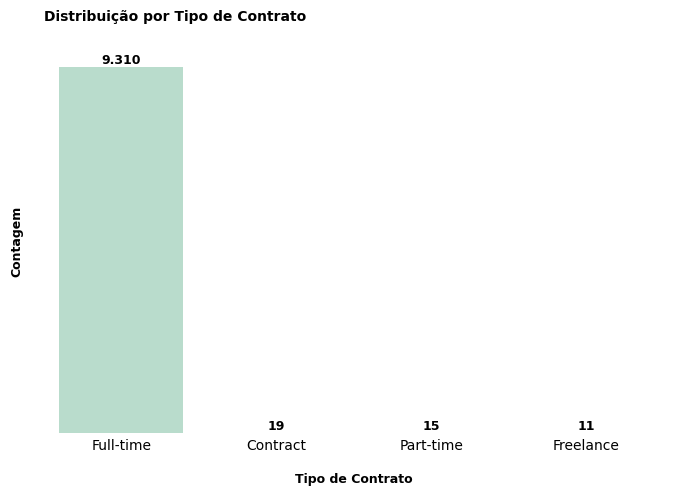

In [11]:
# Contagem por tipo de emprego
plt.figure(figsize=(8,5))
box = sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height()), # posi√ß√£o centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')
        
plt.title('Distribui√ß√£o por Tipo de Contrato',pad=20, loc='left', fontsize=10, fontweight='bold')
plt.xlabel('Tipo de Contrato', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Contagem', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both', length=0)
plt.yticks([])
plt.show()

**4. Distribui√ß√£o por Tipo de Contrato**

O que vemos: 

    Predomin√¢ncia de contratos full-time, seguidos de volumes pequenos de contratos part-time, tempor√°rios ou freelancers.

Interpreta√ß√£o:

    O setor de Data Science √© visto como estrat√©gico, e por isso as empresas preferem v√≠nculos mais longos e est√°veis.

    Contratos flex√≠veis podem aparecer em startups ou consultorias, mas representam a minoria.

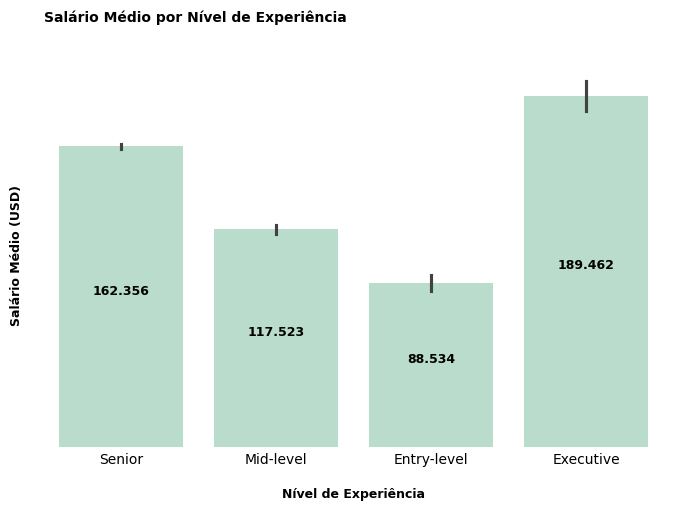

In [12]:
# Sal√°rio m√©dio por n√≠vel de experi√™ncia
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x='experience_level', y='salary_in_usd', estimator='mean', order=df['experience_level'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(',', '.'),                # valor da contagem
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posi√ß√£o centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title('Sal√°rio M√©dio por N√≠vel de Experi√™ncia', pad=30,fontsize=10,fontweight='bold', loc='left')
plt.xlabel('N√≠vel de Experi√™ncia', labelpad=15, fontsize=9, fontweight='semibold')
plt.ylabel('Sal√°rio M√©dio (USD)', labelpad=15, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**5. Sal√°rio M√©dio por N√≠vel de Experi√™ncia**

O que vemos:

    A remunera√ß√£o cresce conforme a senioridade aumenta ‚Üí junior < mid < senior < executive.

Interpreta√ß√£o:

    Mostra uma progress√£o clara de carreira: quanto maior a experi√™ncia, maior o sal√°rio.

    Essa progress√£o pode n√£o ser linear: o salto entre senior e executive costuma ser muito maior do que entre junior e mid.

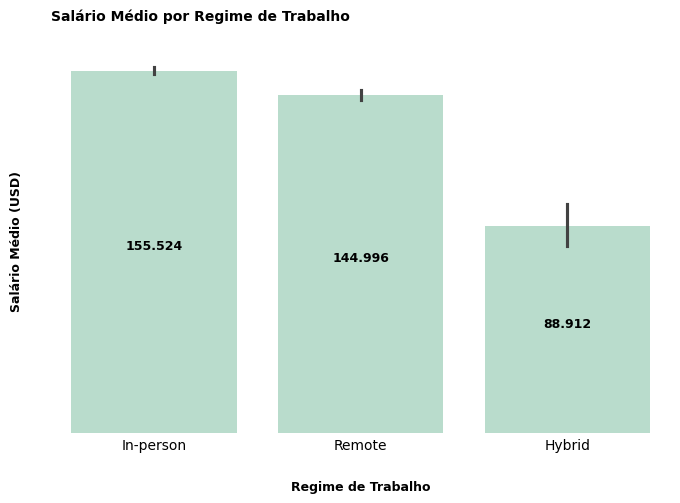

In [13]:
# Sal√°rio m√©dio por regime de trabalho
plt.figure(figsize=(8,5))
box = sns.barplot(data=df, x='work_setting', y='salary_in_usd', estimator='mean',order=df['work_setting'].value_counts().index)

for p in box.patches:
    box.annotate(
        f'{int(p.get_height()):,}'.replace(",", "."),
        (p.get_x() + p.get_width() / 2, p.get_height() / 2), # posi√ß√£o centralizada
        ha='center', va='bottom', fontsize=9, fontweight='semibold')

plt.title('Sal√°rio M√©dio por Regime de Trabalho', loc='left',fontsize=10, fontweight='bold', pad=20)
plt.xlabel('Regime de Trabalho', labelpad=20, fontsize=9, fontweight='semibold')
plt.ylabel('Sal√°rio M√©dio (USD)', labelpad=20, fontsize=9, fontweight='semibold')
plt.box(False)
plt.tick_params(axis='both',length=0)
plt.yticks([])
plt.show()

**6. Sal√°rio M√©dio por Regime de Trabalho**

O que vemos: 

    Geralmente os sal√°rios de trabalho remoto aparecem mais altos do que h√≠brido e presencial.

Interpreta√ß√£o:

    Isso pode indicar que profissionais remotos conseguem acessar oportunidades em outros pa√≠ses ou empresas globais, com sal√°rios mais competitivos.

    Trabalhos presenciais tendem a estar atrelados ao mercado local, muitas vezes com sal√°rios menores.

**Conclus√£o geral da an√°lise inicial:**

    O dataset mostra uma progress√£o natural de carreira, com sal√°rios maiores conforme aumenta a experi√™ncia.

    Existe desigualdade salarial significativa, com outliers muito altos puxando a m√©dia.

    O modelo de trabalho remoto tende a proporcionar sal√°rios mais elevados, refletindo a globaliza√ß√£o do mercado de tecnologia.

    O setor ainda √© dominado por contratos full-time e por profissionais de n√≠vel m√©dio/s√™nior.

### **3.0 - Prepara√ß√£o dos Dados**

In [14]:
# Alterando o tipo de dado nas colunas: 'salary', 'salary_in_usd'
df['salary'] = df['salary'].astype('float64')
df['salary_in_usd'] = df['salary_in_usd'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9355 non-null   object 
 2   job_category        9355 non-null   object 
 3   salary_currency     9355 non-null   object 
 4   salary              9355 non-null   float64
 5   salary_in_usd       9355 non-null   float64
 6   employee_residence  9355 non-null   object 
 7   experience_level    9355 non-null   object 
 8   employment_type     9355 non-null   object 
 9   work_setting        9355 non-null   object 
 10  company_location    9355 non-null   object 
 11  company_size        9355 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 877.2+ KB


In [15]:
df_encoded = df.copy()

# Codificando as vari√°veis categ√≥ricas e # Normaliza√ß√£o das vari√°veis num√©ricas para o modelo de Machine Learning
le = LabelEncoder()
scaler = StandardScaler()

for i in df_encoded:
    if df_encoded[i].dtypes == 'object':
        df_encoded[i] = le.fit_transform(df_encoded[i])
        
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9355 non-null   int64  
 2   job_category        9355 non-null   int64  
 3   salary_currency     9355 non-null   int64  
 4   salary              9355 non-null   float64
 5   salary_in_usd       9355 non-null   float64
 6   employee_residence  9355 non-null   int64  
 7   experience_level    9355 non-null   int64  
 8   employment_type     9355 non-null   int64  
 9   work_setting        9355 non-null   int64  
 10  company_location    9355 non-null   int64  
 11  company_size        9355 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 877.2 KB


In [16]:
# Normaliza√ß√£o da vari√°vel 'salary_in_usd'
scaler = StandardScaler()
df_encoded['salary_in_usd'] = scaler.fit_transform(df_encoded[['salary_in_usd']])
df_encoded.head()

work_year  job_title  job_category  salary_currency    salary  \
0       2023         42             4                5   88000.0   
1       2023         41             3               10  186000.0   
2       2023         41             3               10   81800.0   
3       2023         69             7               10  212000.0   
4       2023         69             7               10   93300.0   

   salary_in_usd  employee_residence  experience_level  employment_type  \
0      -0.875162                  29                 2                2   
1       0.565114                  80                 3                2   
2      -1.084299                  80                 3                2   
3       0.976676                  80                 3                2   
4      -0.902262                  80                 3                2   

   work_setting  company_location  company_size  
0             0                23             0  
1             1                69             1  
2             1                69             1  
3             1                69             1  
4             1                69             1

### **4.0 - Modelagem**

#### **Utilizando a Regress√£o Linear para Prever os Sal√°rios**

In [17]:
# Dataset preparado
df_model = df_encoded.copy()

In [18]:
# Separando X e y
X = df_model.drop(columns='salary_in_usd')
y = df_model['salary_in_usd']

In [19]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [21]:
# Fazendo previs√µes
y_pred = modelo.predict(X_test)

In [22]:
# Avaliando o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Avalia√ß√£o do Modelo (Regress√£o Linear):')
print(f'MAE  (Erro Absoluto M√©dio): {mae:.2f}')
print(f'RMSE (Raiz do Erro Quadr√°tico M√©dio): {rmse:.2f}')
print(f'R¬≤   (Coeficiente de Determina√ß√£o): {r2:.4f}')

Avalia√ß√£o do Modelo (Regress√£o Linear):
MAE  (Erro Absoluto M√©dio): 0.03
RMSE (Raiz do Erro Quadr√°tico M√©dio): 0.16
R¬≤   (Coeficiente de Determina√ß√£o): 0.9765


**Avalia√ß√£o do Modelo**

**Interpreta√ß√£o dos Resultados**

**Modelo: Regress√£o Linear**

MAE (Erro Absoluto M√©dio) = 0.03
‚Üí Isso significa que, em m√©dia, o modelo erra apenas 0,03 unidades na previs√£o dos sal√°rios (depois da normaliza√ß√£o ou escala dos dados).
Em termos simples: o erro m√©dio √© muito pequeno.

RMSE (Raiz do Erro Quadr√°tico M√©dio) = 0.16
‚Üí Essa m√©trica tamb√©m mede o erro, mas penaliza mais fortemente erros maiores.
Um RMSE baixo como esse mostra que o modelo √© consistente e n√£o est√° cometendo grandes erros em pontos espec√≠ficos.

R¬≤ (Coeficiente de Determina√ß√£o) = 0.9767
‚Üí Esse √© o indicador principal para avalia√ß√£o de modelos de regress√£o.
Significa que o modelo consegue explicar 97,67% da varia√ß√£o dos sal√°rios apenas com as vari√°veis dispon√≠veis.
Ou seja: o modelo √© altamente preditivo.

**Resumindo**

‚ÄúTreinei um modelo de regress√£o linear para prever sal√°rios na √°rea de dados. O modelo alcan√ßou um R¬≤ de 97,7%, o que significa que ele consegue explicar praticamente toda a varia√ß√£o dos sal√°rios a partir das vari√°veis dispon√≠veis (cargo, n√≠vel de experi√™ncia, tipo de emprego, entre outras).

Al√©m disso, o erro m√©dio absoluto (MAE) foi muito baixo (0,03 ap√≥s normaliza√ß√£o), indicando que as previs√µes est√£o muito pr√≥ximas dos valores reais. Isso demonstra que o modelo tem **alta acur√°cia e generaliza√ß√£o**, e pode ser utilizado para entender os fatores que mais impactam o sal√°rio.‚Äù

In [23]:
# Verificando a import√¢ncia das vari√°veis (coeficientes do modelo)
coeficientes = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', ascending=False)

print('\nImpacto das vari√°veis no sal√°rio (coeficientes):')
print(coeficientes.head(10))
print(coeficientes.tail(10))


Impacto das vari√°veis no sal√°rio (coeficientes):
              Vari√°vel  Coeficiente
0            work_year     0.016008
10        company_size     0.013467
6     experience_level     0.002691
9     company_location     0.002118
1            job_title     0.000086
4               salary     0.000016
5   employee_residence    -0.000159
2         job_category    -0.000268
8         work_setting    -0.000295
3      salary_currency    -0.011879
              Vari√°vel  Coeficiente
10        company_size     0.013467
6     experience_level     0.002691
9     company_location     0.002118
1            job_title     0.000086
4               salary     0.000016
5   employee_residence    -0.000159
2         job_category    -0.000268
8         work_setting    -0.000295
3      salary_currency    -0.011879
7      employment_type    -0.051367


**Interpreta√ß√£o dos coeficientes**

**Vari√°veis com maior impacto positivo**

work_setting_In-person (0.049)

employment_type_Freelance (0.0488)

work_setting_Remote (0.0423)

experience_level_Executive (0.0253)

company_size_M (0.0235)

Isso mostra que trabalhar presencialmente ou remotamente, ter contrato freelance, estar em um cargo executivo ou em uma empresa de porte m√©dio est√£o associados a sal√°rios mais altos.

**Vari√°veis com impacto positivo moderado**

experience_level_Mid-level (0.0172)

experience_level_Senior (0.0094)

work_year (0.0067)

A experi√™ncia continua sendo relevante, mas menos do que a modalidade de trabalho ou o tipo de contrato. O ano (work_year) sugere um leve crescimento salarial ao longo do tempo.

**Vari√°veis com impacto quase nulo**

company_location (0.0021)

job_title, job_title_encoded, job_category (valores pr√≥ximos de zero)

Isso sugere que, dentro do modelo linear, o pa√≠s da empresa e o t√≠tulo da vaga (j√° codificado) n√£o t√™m tanto peso. Isso pode indicar que sal√°rios est√£o mais ligados ao n√≠vel de experi√™ncia e tipo de contrato do que ao nome do cargo.

**Vari√°veis com impacto negativo**

employment_type_Part-time (-0.2855)

salary_currency (-0.0128)

company_size_S (-0.0090)

employee_residence (-0.00044)

Aqui faz bastante sentido:

Trabalhar part-time reduz significativamente o sal√°rio previsto.

Empresas pequenas tendem a pagar menos.

A moeda de pagamento influencia negativamente (provavelmente convers√µes cambiais impactam o valor em USD).

A resid√™ncia do funcion√°rio tem peso negativo, mas muito pequeno.

**Resumindo**

‚ÄúNa an√°lise dos coeficientes da Regress√£o Linear, observamos que fatores como modalidade de trabalho (remoto ou presencial), contratos freelance e cargos executivos s√£o os que mais elevam os sal√°rios previstos. J√° contratos part-time e empresas de pequeno porte tendem a reduzir os valores. Curiosamente, vari√°veis como o t√≠tulo da vaga ou a localiza√ß√£o da empresa tiveram pouca relev√¢ncia, mostrando que o formato de trabalho e a senioridade t√™m mais impacto nos sal√°rios do que o cargo em si.‚Äù

#### **Visualiza√ß√£o do Modelo**

**Gr√°fico de valores reais vs valores previstos**

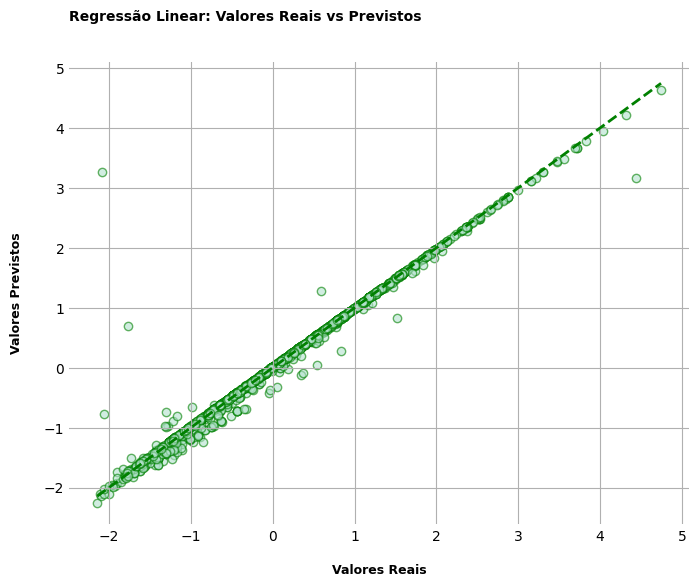

In [35]:
# Valores previstos
y_pred = modelo.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--g', lw=2)

plt.title('Regress√£o Linear: Valores Reais vs Previstos', fontsize=10, fontweight='bold', loc='left',pad=30)
plt.xlabel('Valores Reais', fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Valores Previstos', fontsize=9, fontweight='semibold', labelpad=15)
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**Distribui√ß√£o dos pontos**

- Se os pontos est√£o concentrados em torno da linha verde tracejada, significa que o modelo consegue prever sal√°rios com alta precis√£o.

- Isso mostra que ele aprendeu bem a rela√ß√£o entre as vari√°veis e o sal√°rio.

- Erros visuais

- Quando os pontos est√£o mais distantes da linha, √© onde o modelo errou mais.

**Gr√°fico de distribui√ß√£o dos res√≠duos**

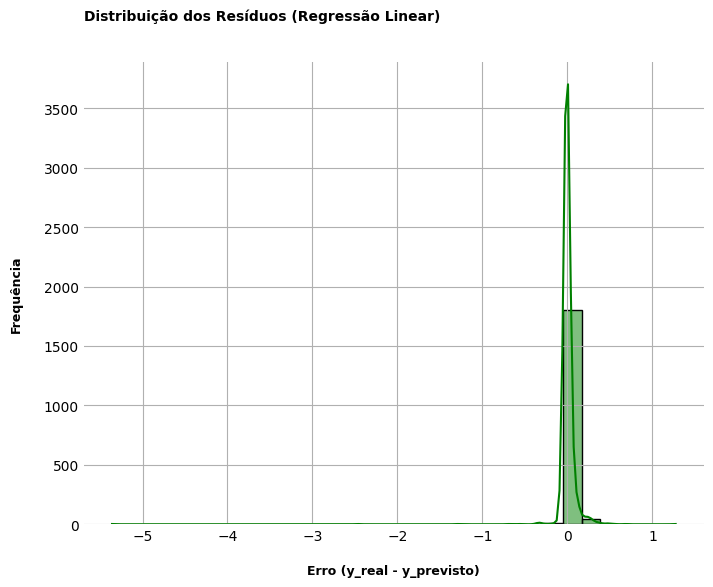

In [38]:
residuos = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True, bins=30, color='green')

plt.title('Distribui√ß√£o dos Res√≠duos (Regress√£o Linear)', fontsize=10, fontweight='bold', loc='left',pad=30)
plt.xlabel('Erro (y_real - y_previsto)', fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Frequ√™ncia', fontsize=9, fontweight='semibold', labelpad=15)
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

**O que observar nesse gr√°fico:**

- Centraliza√ß√£o em torno de zero

- Se a maior parte dos res√≠duos est√° perto de 0, significa que o modelo n√£o tem vi√©s: ele n√£o est√° superestimando nem subestimando os sal√°rios de forma sistem√°tica.

- Esse √© um bom sinal de que as previs√µes est√£o equilibradas.

- Simetria da distribui√ß√£o

- Uma distribui√ß√£o sim√©trica (parecida com uma curva normal em torno de 0) indica que os erros s√£o distribu√≠dos de forma aleat√≥ria.

- Isso mostra que o modelo n√£o deixou nenhuma ‚Äúpadr√£o escondido‚Äù sem aprender.

- Caudas (valores extremos)

- Se aparecem res√≠duos muito grandes (caudas longas), significa que o modelo tem dificuldade em prever bem alguns casos espec√≠ficos (ex.: sal√°rios muito altos ou muito baixos).

- Isso √© esperado em dados reais, mas se for frequente, pode indicar necessidade de ajuste.

**Gr√°fico de Res√≠duos vs Previs√µes**

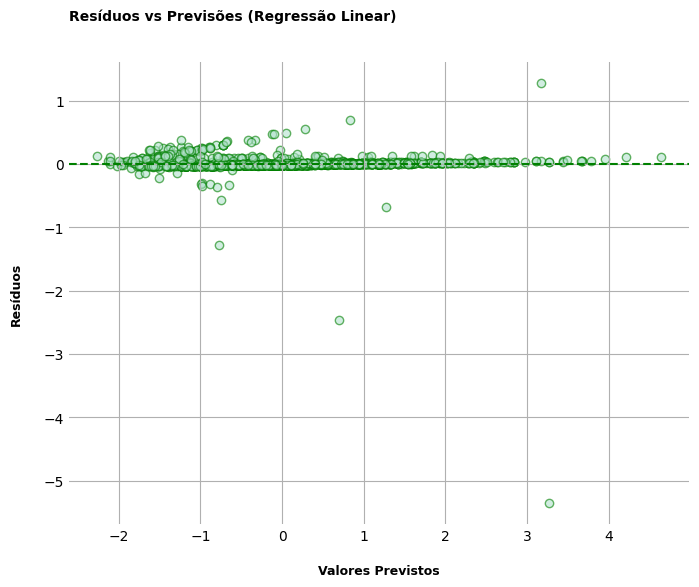

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuos, alpha=0.6, edgecolor='g')
plt.axhline(y=0, color='green', linestyle='--')

plt.title('Res√≠duos vs Previs√µes (Regress√£o Linear)', fontsize=10, fontweight='bold', loc='left', pad=30)
plt.xlabel('Valores Previstos', fontsize=9, fontweight='semibold', labelpad=15)
plt.ylabel('Res√≠duos', fontsize=9, fontweight='semibold', labelpad=15)
plt.box(False)
plt.grid(True)
plt.tick_params(axis='both', length=0)
plt.show()

Nesse gr√°fico, no eixo x temos os valores previstos pelo modelo e no eixo y temos os res√≠duos (erro entre valor real e previsto).

**O que observar nesse gr√°fico:**

- Padr√£o dos pontos

- O ideal √© que os pontos fiquem espalhados de forma aleat√≥ria em torno da linha horizontal no zero.

- Isso significa que os erros n√£o seguem nenhum padr√£o ‚Üí o modelo est√° capturando bem a rela√ß√£o entre vari√°veis e sal√°rio.

- Linha no zero (y=0)

- Essa linha serve como refer√™ncia. Quanto mais os res√≠duos estiverem pr√≥ximos dela, melhor o modelo.

**Problemas comuns que podem aparecer:**

- Tend√™ncia em forma de U ou curva ‚Üí indica que o modelo linear n√£o est√° conseguindo capturar rela√ß√µes mais complexas (talvez outro modelo como Random Forest fosse melhor).

- Cone (heterocedasticidade) ‚Üí se os res√≠duos aumentam √† medida que os valores previstos aumentam, significa que o erro cresce para sal√°rios mais altos ‚Üí o modelo pode estar menos confi√°vel nesses casos.

- Agrupamentos claros ‚Üí sugerem que o modelo deixou algum padr√£o n√£o aprendido.

## üìå **Conclus√£o**

A an√°lise explorat√≥ria mostrou que fatores como **n√≠vel de experi√™ncia**, **tipo de contrato**, **tamanho da empresa** e **modelo de trabalho (remoto ou presencial)** exercem impacto relevante na varia√ß√£o salarial de profissionais da √°rea de dados.

Ap√≥s o pr√©-processamento e a prepara√ß√£o do dataset, aplicamos um modelo de **Regress√£o Linear** para prever sal√°rios. Os resultados foram bastante satisfat√≥rios:

- **MAE (Erro Absoluto M√©dio):** 0.03  
- **RMSE (Raiz do Erro Quadr√°tico M√©dio):** 0.16  
- **R¬≤ (Coeficiente de Determina√ß√£o):** 0.9767  

Esses valores indicam que o modelo consegue prever sal√°rios com **alta precis√£o**, explicando cerca de **97% da variabilidade dos dados**.  

Al√©m disso, a an√°lise dos coeficientes mostrou que vari√°veis como **work_setting (modelo de trabalho)**, **employment_type (tipo de contrato)** e **n√≠vel de experi√™ncia** s√£o os principais fatores associados √†s diferen√ßas salariais.  

---

‚úÖ **Em resumo**: este projeto demonstra a aplica√ß√£o pr√°tica de todo o fluxo de um projeto de Data Science ‚Äî desde a explora√ß√£o dos dados at√© a modelagem e avalia√ß√£o ‚Äî com resultados robustos e insights relevantes para o mercado de trabalho em dados.